In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal

In [3]:
data = pd.read_pickle(f'/home/ilya/Documents/stress-level-by-PPG/data.pkl')
ppg = data['S7']['PPG_medit']

[0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.  ]


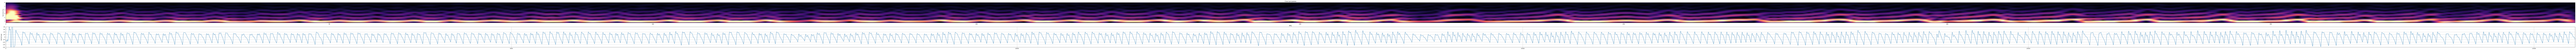

In [4]:
frequencies, times, Zxx = signal.stft(
    ppg, 
    fs=64, 
    window='hann', 
    nperseg=256,
    noverlap=250
)

spectrogram = np.abs(Zxx)
# print(frequencies)

# Маска для целевой частоты
min_fr = 0.5
max_fr = 6
freq_mask = (frequencies >= min_fr) & (frequencies <= max_fr)
print(frequencies[freq_mask])

# Амплитуда в целевой полосе
amplitude_in_band = np.mean(np.abs(Zxx[freq_mask, :]), axis=0)

wight = len(ppg) / 64
plt.figure(figsize=(wight, 7))

plt.subplot(2, 1, 1)
plt.pcolormesh(times, frequencies[freq_mask], spectrogram[freq_mask, : ], shading='gouraud', cmap='magma', vmin = 0, vmax=7)
# plt.colorbar(label='Амплитуда (дБ)')
plt.ylabel('Частота (Гц)')
plt.title('Спектрограмма')

plt.subplot(2, 1, 2)
plt.plot(ppg)
plt.ylabel('Амплитуда')
plt.title(f'PPG')
plt.grid(True)
plt.margins(x=0)
plt.ylim(-40, 40)

plt.savefig(f'/home/ilya/Documents/stress-level-by-PPG/spgrm_ppg_st.png', dpi=300, bbox_inches='tight')

plt.show()

plt.close()